<a href="https://colab.research.google.com/github/DawoodBhai420/Brain-Tumor-Detection/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18678  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          11340  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5819  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3981  
nickuzmenkov/nih-chest-xrays-tfrecords    

In [2]:
! kaggle datasets download -d preetviradiya/brian-tumor-dataset

 86% 92.0M/107M [00:00<00:00, 117MB/s]
100% 107M/107M [00:00<00:00, 138MB/s] 


In [3]:
import os
import zipfile

local_zip = '/content/brian-tumor-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./brian-tumor-dataset')

zip_ref.close()

In [4]:
brain_tumor_images = os.path.join('/content/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor')
healthy_images = os.path.join('/content/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy')

In [5]:
print(len(os.listdir(brain_tumor_images)))
print(len(os.listdir(healthy_images)))

2513
2087


In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [16]:
datagen = ImageDataGenerator(rescale=1./255,validation_split = 0.2,zoom_range=(0.99,0.99),dtype=tf.float32)
train_generator = datagen.flow_from_directory('/content/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set',
                                              target_size = (150,150),
                                              batch_size = 256,
                                              class_mode = "binary",
                                              color_mode = "rgb",
                                              shuffle = True,
                                              seed = 123,
                                              subset = "training")
validation_generator = datagen.flow_from_directory('/content/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set',
                                                   target_size = (150,150),
                                                   batch_size = 8,
                                                   class_mode = "binary",
                                                   color_mode = "rgb",
                                                   shuffle = True,
                                                   seed = 123,
                                                   subset = "validation")

Found 3681 images belonging to 2 classes.
Found 919 images belonging to 2 classes.


In [17]:
classes = validation_generator.class_indices
classes

{'Brain Tumor': 0, 'Healthy': 1}

In [18]:
import matplotlib.pyplot as plt

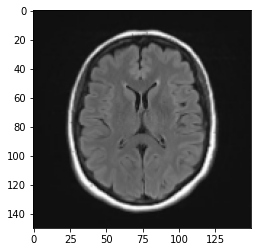

In [19]:
batch = next(validation_generator)
plt.imshow(batch[0][0])

In [23]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3), padding='same'),
                                 keras.layers.MaxPool2D(),
                                 keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
                                 keras.layers.MaxPool2D(),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Dense(64, activation='relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 87616)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [26]:
history = model.fit(train_generator,
                    verbose=2,
                    epochs=20,
                    validation_data=validation_generator)

Epoch 1/20
15/15 - 39s - loss: 0.6432 - accuracy: 0.6851 - val_loss: 1.2311 - val_accuracy: 0.5876 - 39s/epoch - 3s/step
Epoch 2/20
15/15 - 36s - loss: 0.4061 - accuracy: 0.8185 - val_loss: 0.5189 - val_accuracy: 0.7367 - 36s/epoch - 2s/step
Epoch 3/20
15/15 - 36s - loss: 0.2348 - accuracy: 0.9104 - val_loss: 0.3492 - val_accuracy: 0.8585 - 36s/epoch - 2s/step
Epoch 4/20
15/15 - 35s - loss: 0.1427 - accuracy: 0.9565 - val_loss: 0.3636 - val_accuracy: 0.8400 - 35s/epoch - 2s/step
Epoch 5/20
15/15 - 36s - loss: 0.0829 - accuracy: 0.9766 - val_loss: 0.1901 - val_accuracy: 0.9554 - 36s/epoch - 2s/step
Epoch 6/20
15/15 - 35s - loss: 0.0600 - accuracy: 0.9851 - val_loss: 0.1486 - val_accuracy: 0.9608 - 35s/epoch - 2s/step
Epoch 7/20
15/15 - 36s - loss: 0.0483 - accuracy: 0.9905 - val_loss: 0.1153 - val_accuracy: 0.9608 - 36s/epoch - 2s/step
Epoch 8/20
15/15 - 39s - loss: 0.0306 - accuracy: 0.9951 - val_loss: 0.0868 - val_accuracy: 0.9869 - 39s/epoch - 3s/step
Epoch 9/20
15/15 - 36s - loss: 0

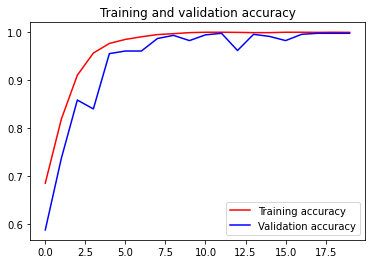

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

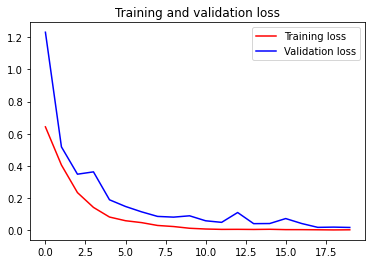

<Figure size 432x288 with 0 Axes>

In [28]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [34]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is having Brain Tumor.")
  else:
    print(fn + " is healthy.")
    

Saving images (3).jpg to images (3).jpg
[1.]
images (3).jpg is healthy.
